# data preprocessing

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv("TS.csv",sep=";") #i called the csv file TS for abreviation 
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#there is two null values in the column 'Embarked' so we are going to those Null value with the most frequent value in teh colomn
titanic['Embarked'] =titanic['Embarked'].fillna(method='pad')
#as we can see here the number of null value in the column 'Cabin' is high than non null value so we are going to drop it
titanic.drop(['Cabin'], axis='columns', inplace=True)
#about filling null values in the column 'age' we are going to use the mean
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [23]:
#we are digging deeper by adding a new column to see wether the person is an adult or a child
def titanic_children(passenger):
    
    age , sex = passenger
    if age <18:
        return 'child'
    else:
        return sex

titanic['person'] = titanic[['Age','Sex']].apply(titanic_children,axis=1)
titanic.drop(['Sex'], axis='columns', inplace=True) #we Droped the column Sex because we created a new one the column"person"
titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,343,No,2,"Collander, Mr. Erik Gustaf",28.0,0,0,248740,13.0000,NaN,S,male
1,76,No,3,"Moen, Mr. Sigurd Hansen",25.0,0,0,348123,7.6500,F G73,S,male
2,641,No,3,"Jensen, Mr. Hans Peder",20.0,0,0,350050,7.8542,NaN,S,male
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.0,0,4,349909,21.0750,NaN,S,female
4,672,No,1,"Davidson, Mr. Thornton",31.0,1,0,F.C. 12750,52.0000,B71,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,child
887,61,No,3,"Sirayanian, Mr. Orsen",22.0,0,0,2669,7.2292,NaN,C,male
888,535,No,3,"Cacic, Miss. Marija",30.0,0,0,315084,8.6625,NaN,S,female
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",NaN,0,0,349215,7.8958,NaN,S,male


# Data visualisation 

<AxesSubplot:ylabel='person'>

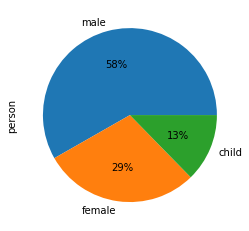

In [15]:
titanic.person.value_counts().plot.pie(autopct='%1.0f%%')

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Pclass  person
1       child      12
        female     86
        male      118
2       child      23
        female     64
        male       97
3       child      78
        female    109
        male      304
Name: person, dtype: int64

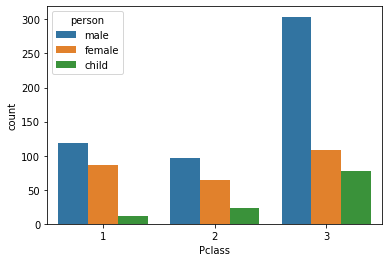

In [27]:
sns.countplot('Pclass',data=titanic,hue = 'person')
titanic.groupby(by=['Pclass','person'])['person'].count()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

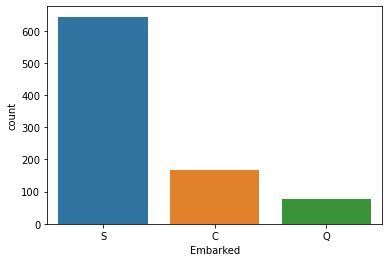

In [33]:
sns.countplot(x='Embarked', data=titanic)

the numbers of persons who survived is 342
the numbers of persons who doesnt survived is 549


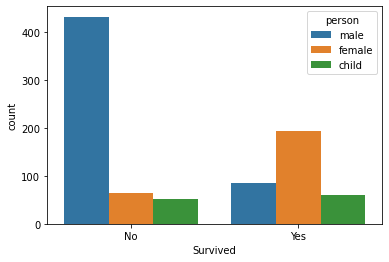

In [34]:
sns.countplot(x='Survived', data=titanic ,hue='person')
print("the numbers of persons who survived is",titanic['Survived'].value_counts()['Yes'] )
print("the numbers of persons who doesnt survived is",titanic['Survived'].value_counts()['No'] ) #counting the numbers of survivals

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


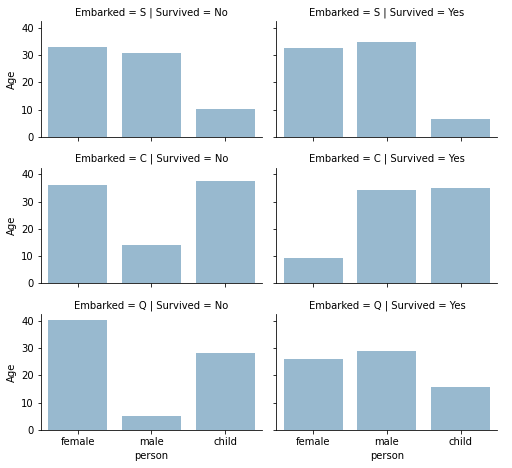

In [36]:
grid = sns.FacetGrid(titanic, row="Embarked", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "person", 'Age', alpha=.5, ci=None)
grid.add_legend()

In [39]:
#as we can see here the highest numbers of survivals is males then females then childs
def get_title(df):
    # Get names from data frame
    name_data = df["Name"]
    
    # Obtain titles
    df["Title"] = [name.split(", ", 1)[1].split(".", 1)[0] for name in name_data]
    
    # Find all titles
    titles = []
    for title in df["Title"]:
        if title not in titles:
            titles.append(title)        
    
    return df, titles

titanic, titles = get_title(titanic)
print(titles)
titanic.groupby("Title")["Age"].mean()

['Mr', 'Mrs', 'Miss', 'Dr', 'Major', 'Don', 'Master', 'Rev', 'Col', 'Mlle', 'Lady', 'Jonkheer', 'Mme', 'Sir', 'Capt', 'the Countess', 'Ms']


Title
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [45]:
#after dropping the column names
pd.crosstab(titanic["Title"], titanic["person"]).T.style.background_gradient(cmap = "summer_r")

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
person,,,,,,,,,,,,,,,,,
child,0,0,0,0,0,0,0,36,51,0,0,22,4,0,0,0,0
female,0,0,0,1,0,1,0,0,131,2,1,0,121,1,0,0,1
male,1,2,1,6,1,0,2,4,0,0,0,495,0,0,6,1,0


In [46]:
#this feature show how many people have siblings in the ship (family size)
pd.crosstab([titanic["Pclass"], titanic["Survived"]], titanic["SibSp"], margins = True).style.background_gradient(cmap = "summer_r")